<a href="https://colab.research.google.com/github/anasmita3/Alfido-Tech-Internship/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-10-1325539827.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-10-1325539827.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

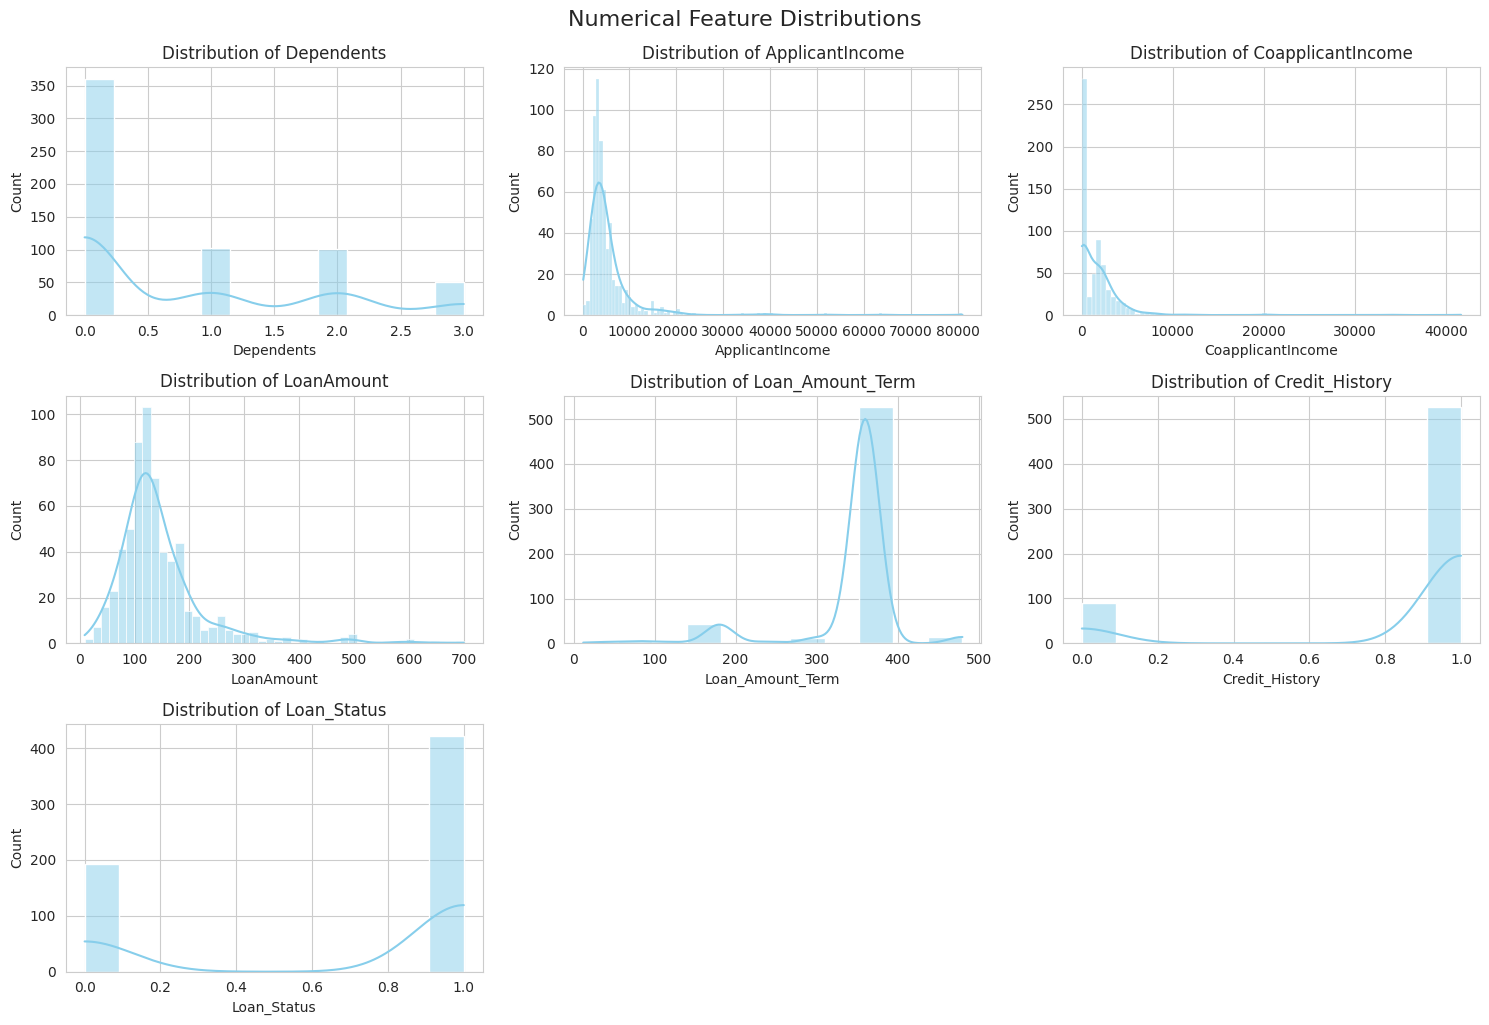

/tmp/ipython-input-10-1325539827.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-10-1325539827.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-10-1325539827.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-10-1325539827.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

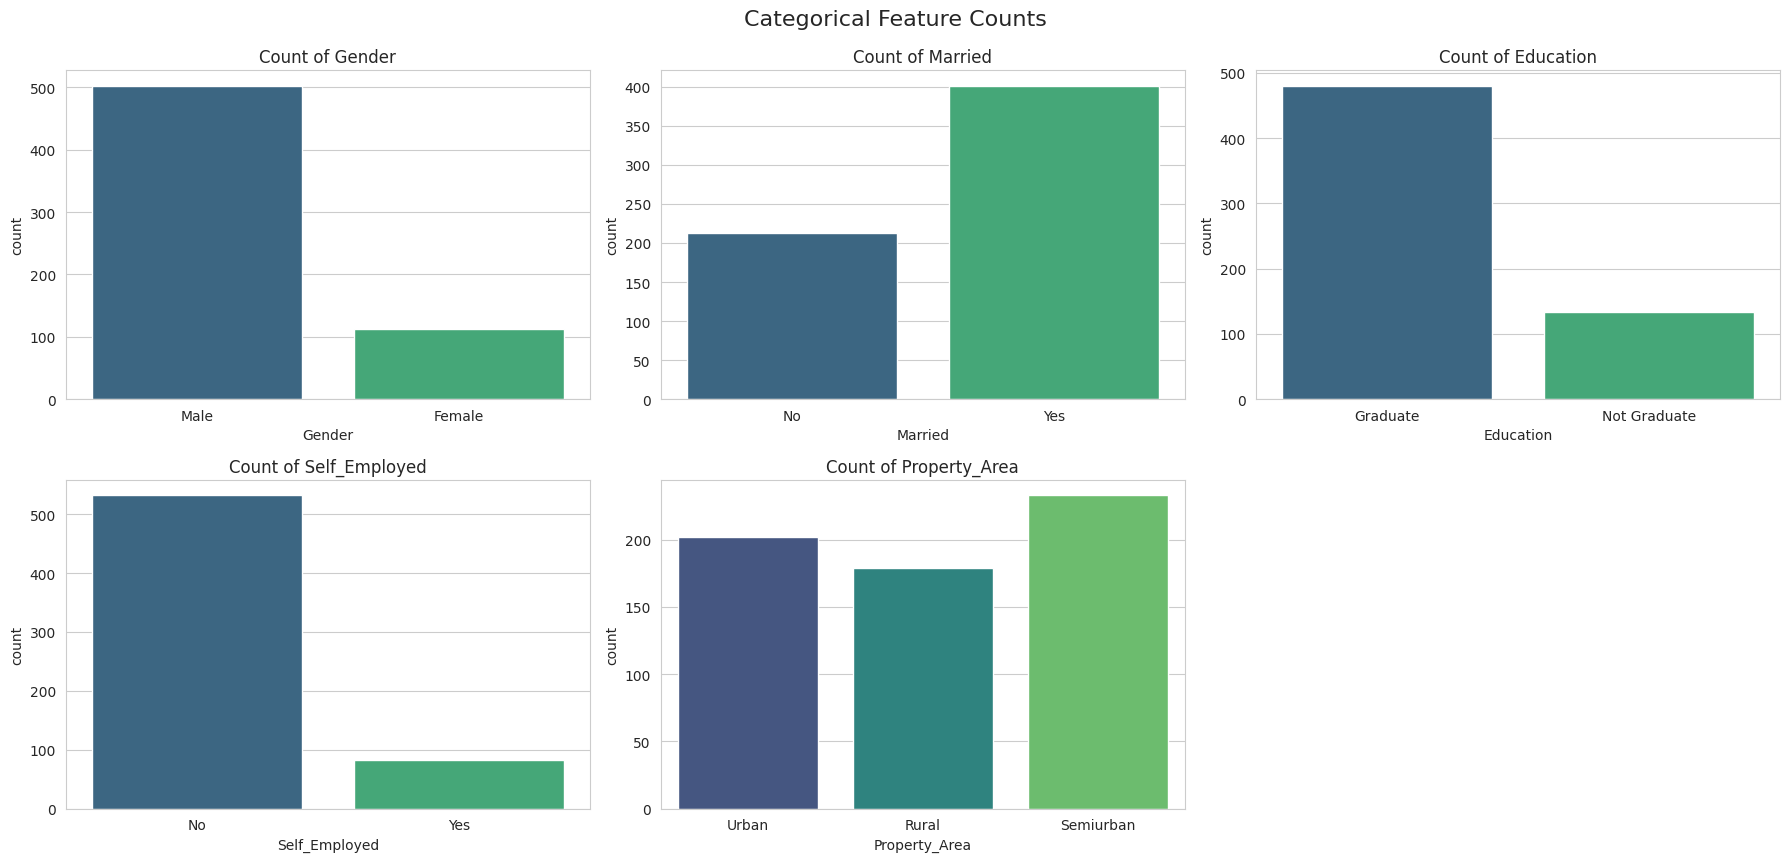

/tmp/ipython-input-10-1325539827.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=col, data=df, palette='pastel')
/tmp/ipython-input-10-1325539827.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=col, data=df, palette='pastel')
/tmp/ipython-input-10-1325539827.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=col, data=df, palette='pastel')


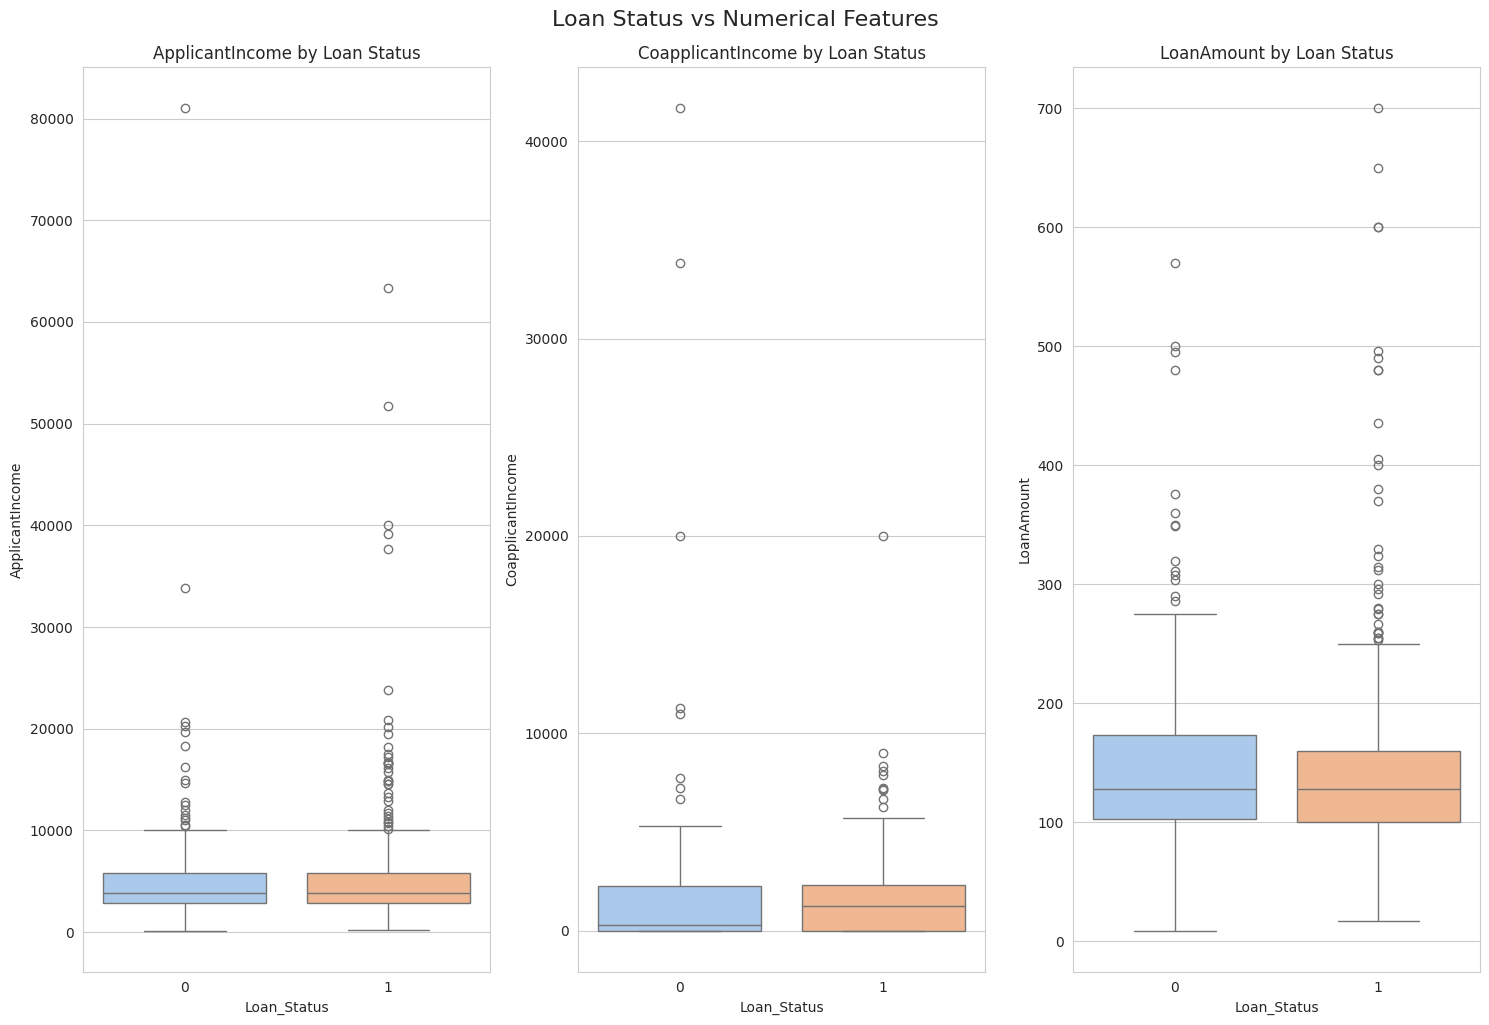

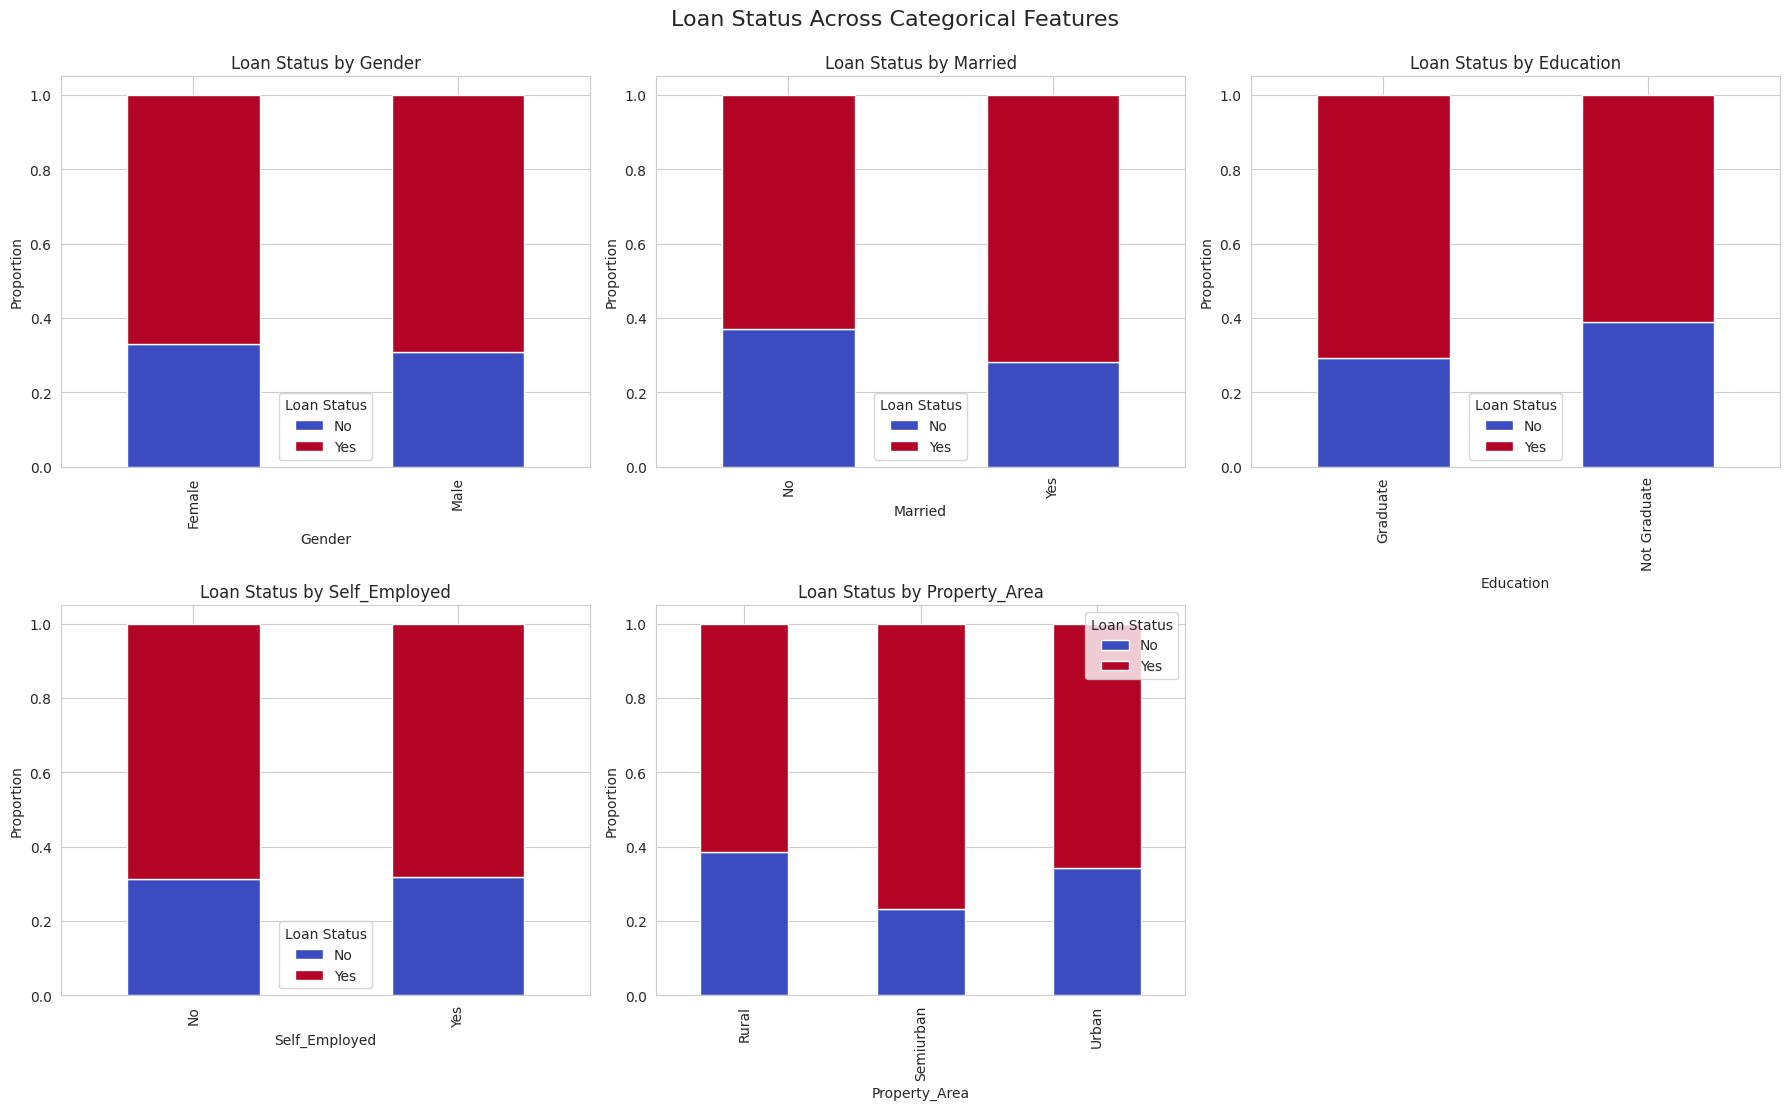

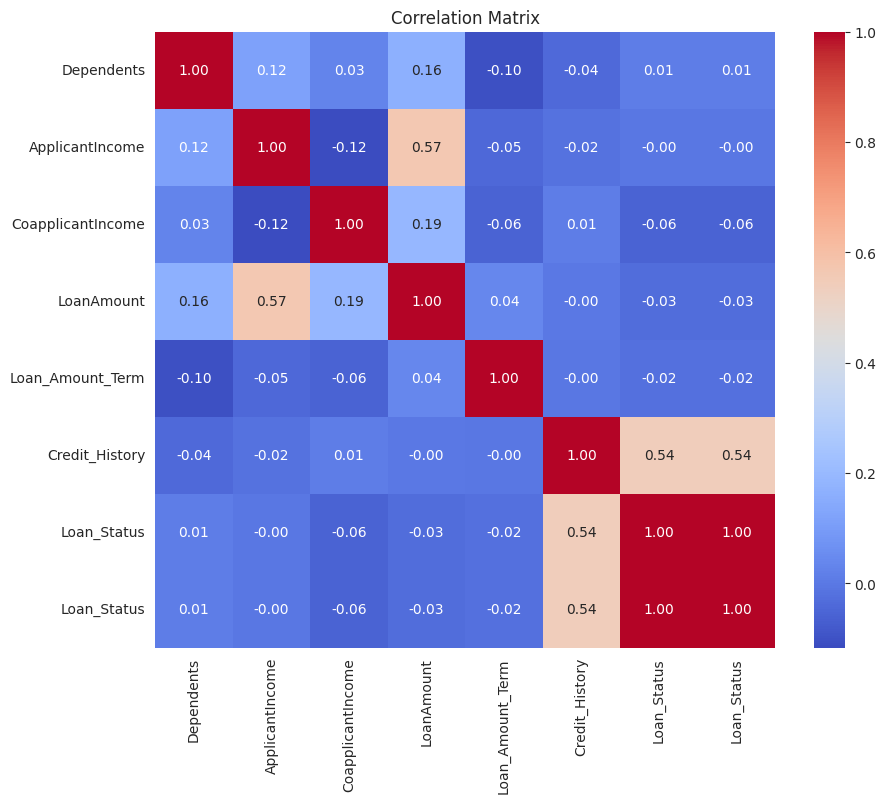

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Correct columns
column_names = [
    'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
    'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
    'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
    'Property_Area', 'Loan_Status'
]

# Load CSV while skipping corrupted header
df = pd.read_csv('/content/loan_prediction.csv', skiprows=1, names=column_names)

# Drop any garbage columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Convert numeric columns
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert Loan_Status
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Impute missing numeric values
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    df[col].fillna(df[col].median(), inplace=True)

# Impute missing categorical values
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop Loan_ID
df.drop('Loan_ID', axis=1, inplace=True)

# Clean 'Dependents' column
df['Dependents'] = df['Dependents'].replace({'3+': 3})
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce').fillna(0).astype(int)

# Set feature types
categorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# --- Visualization ---

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.suptitle('Numerical Feature Distributions', y=1.02, fontsize=16)
plt.show()

# Count plots
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.suptitle('Categorical Feature Counts', y=1.02, fontsize=16)
plt.show()

# Boxplots: Numerical vs Loan_Status
plt.figure(figsize=(15, 10))
for i, col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Loan_Status', y=col, data=df, palette='pastel')
    plt.title(f'{col} by Loan Status')
plt.tight_layout()
plt.suptitle('Loan Status vs Numerical Features', y=1.02, fontsize=16)
plt.show()

# Loan Status vs Categorical Features (Stacked bars)
plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    prop_df = df.groupby(col)['Loan_Status'].value_counts(normalize=True).unstack()
    prop_df.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='coolwarm')
    plt.title(f'Loan Status by {col}')
    plt.ylabel('Proportion')
    plt.legend(title='Loan Status', labels=['No', 'Yes'])
plt.tight_layout()
plt.suptitle('Loan Status Across Categorical Features', y=1.02, fontsize=16)
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features.tolist() + ['Loan_Status']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
